In [71]:
#Import the dependences
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

#import the requests library
import requests

#import the API Key
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [72]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs =  np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [73]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [74]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

In [75]:
# Starting URL for Weather Map API Call.
city_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [95]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
            # Parse the JSON and retrieve data.
            city_weather = requests.get(city_url).json()
            # Parse out the needed data.
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            # Convert the date to ISO standard.
            city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
            city_data.append({"City": city.title(),
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | charters towers
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 11 of Set 1 | puerto baquerizo moreno
Processing Record 12 of Set 1 | hambantota
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | sataua
City not found. Skipping...
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | comodoro rivadavia
Processing Record 17 of Set 1 | namibe
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 o

Processing Record 37 of Set 4 | yellowknife
Processing Record 38 of Set 4 | amderma
City not found. Skipping...
Processing Record 39 of Set 4 | svetlogorsk
Processing Record 40 of Set 4 | vihari
Processing Record 41 of Set 4 | severo-kurilsk
Processing Record 42 of Set 4 | jieshi
Processing Record 43 of Set 4 | offa
Processing Record 44 of Set 4 | tenenkou
Processing Record 45 of Set 4 | nouadhibou
Processing Record 46 of Set 4 | jackson
Processing Record 47 of Set 4 | zhaodong
Processing Record 48 of Set 4 | hilo
Processing Record 49 of Set 4 | saskatoon
Processing Record 50 of Set 4 | lazaro cardenas
Processing Record 1 of Set 5 | melfi
Processing Record 2 of Set 5 | bathsheba
Processing Record 3 of Set 5 | cockburn town
Processing Record 4 of Set 5 | saskylakh
Processing Record 5 of Set 5 | san patricio
Processing Record 6 of Set 5 | la roche-sur-yon
Processing Record 7 of Set 5 | kamphaeng phet
Processing Record 8 of Set 5 | kharp
Processing Record 9 of Set 5 | salalah
Processing R

Processing Record 29 of Set 8 | vardo
Processing Record 30 of Set 8 | sola
Processing Record 31 of Set 8 | bandar-e torkaman
City not found. Skipping...
Processing Record 32 of Set 8 | pokrovsk
Processing Record 33 of Set 8 | san ramon
Processing Record 34 of Set 8 | spartanburg
Processing Record 35 of Set 8 | zhigalovo
Processing Record 36 of Set 8 | roebourne
Processing Record 37 of Set 8 | supe
Processing Record 38 of Set 8 | balkhash
Processing Record 39 of Set 8 | komsomolskiy
Processing Record 40 of Set 8 | bontang
Processing Record 41 of Set 8 | sattahip
Processing Record 42 of Set 8 | macamic
Processing Record 43 of Set 8 | saint anthony
Processing Record 44 of Set 8 | yenagoa
Processing Record 45 of Set 8 | asau
Processing Record 46 of Set 8 | utiroa
City not found. Skipping...
Processing Record 47 of Set 8 | rock sound
Processing Record 48 of Set 8 | sao joao do piaui
Processing Record 49 of Set 8 | kant
Processing Record 50 of Set 8 | adamas
Processing Record 1 of Set 9 | vi

Processing Record 18 of Set 12 | kragero
Processing Record 19 of Set 12 | puerto quijarro
Processing Record 20 of Set 12 | maceio
Processing Record 21 of Set 12 | puro
Processing Record 22 of Set 12 | yumaguzino
Processing Record 23 of Set 12 | ketchikan
Processing Record 24 of Set 12 | mikhaylovskaya
Processing Record 25 of Set 12 | bolshegrivskoye
City not found. Skipping...
Processing Record 26 of Set 12 | rioja
Processing Record 27 of Set 12 | baglan
Processing Record 28 of Set 12 | barra dos coqueiros
Processing Record 29 of Set 12 | vacha
Processing Record 30 of Set 12 | baikunthpur
Processing Record 31 of Set 12 | pavlodar
Processing Record 32 of Set 12 | santiago del estero
Processing Record 33 of Set 12 | krasnoselkup
Processing Record 34 of Set 12 | chupa
Processing Record 35 of Set 12 | arlit
Processing Record 36 of Set 12 | port angeles
Processing Record 37 of Set 12 | sao gabriel da cachoeira
Processing Record 38 of Set 12 | vilcun
Processing Record 39 of Set 12 | sao fili

In [96]:
len(city_data)

549

In [97]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,78.10,72,10,5.26,PF,2021-04-19 02:37:59
1,Mahebourg,-20.4081,57.7000,78.80,83,75,11.50,MU,2021-04-19 02:38:00
2,Mataura,-46.1927,168.8643,62.01,73,49,10.00,NZ,2021-04-19 02:38:00
3,Charters Towers,-20.1000,146.2667,85.21,44,21,13.91,AU,2021-04-19 02:36:07
4,Vaini,-21.2000,-175.2000,82.40,74,20,6.91,TO,2021-04-19 02:38:01
5,Kodiak,57.7900,-152.4072,50.00,62,40,11.50,US,2021-04-19 02:38:01
6,Albany,42.6001,-73.9662,48.20,81,90,4.14,US,2021-04-19 02:35:32
7,Puerto Baquerizo Moreno,-0.9000,-89.6000,76.57,89,100,5.19,EC,2021-04-19 02:38:02
8,Hambantota,6.1241,81.1185,80.60,94,20,2.30,LK,2021-04-19 02:38:03
9,Kapaa,22.0752,-159.3190,78.80,61,20,13.80,US,2021-04-19 02:38:03


In [99]:
new_column_order = ["City","Country","Date","Lat", "Lng", "Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-04-19 02:37:59,-23.1203,-134.9692,78.10,72,10,5.26
1,Mahebourg,MU,2021-04-19 02:38:00,-20.4081,57.7000,78.80,83,75,11.50
2,Mataura,NZ,2021-04-19 02:38:00,-46.1927,168.8643,62.01,73,49,10.00
3,Charters Towers,AU,2021-04-19 02:36:07,-20.1000,146.2667,85.21,44,21,13.91
4,Vaini,TO,2021-04-19 02:38:01,-21.2000,-175.2000,82.40,74,20,6.91
5,Kodiak,US,2021-04-19 02:38:01,57.7900,-152.4072,50.00,62,40,11.50
6,Albany,US,2021-04-19 02:35:32,42.6001,-73.9662,48.20,81,90,4.14
7,Puerto Baquerizo Moreno,EC,2021-04-19 02:38:02,-0.9000,-89.6000,76.57,89,100,5.19
8,Hambantota,LK,2021-04-19 02:38:03,6.1241,81.1185,80.60,94,20,2.30
9,Kapaa,US,2021-04-19 02:38:03,22.0752,-159.3190,78.80,61,20,13.80


In [100]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [102]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

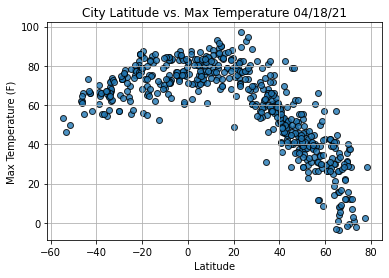

In [103]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

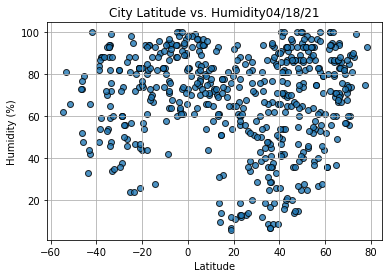

In [104]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

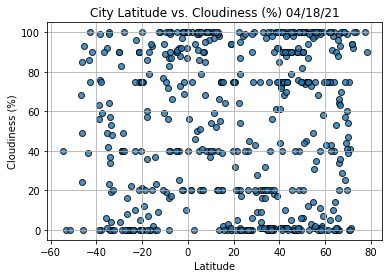

In [105]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

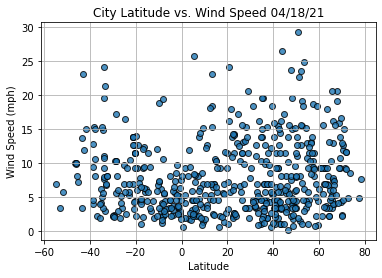

In [106]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()